# Lecture 1 - Beyond Ordinary Least-Squares!

## Loading libraries

In [1]:
source("scripts/support_functions.R")
suppressPackageStartupMessages(library(AER))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(broom))
suppressPackageStartupMessages(library(modelr))
library(mlbench)
library(ggplot2)

## 1. Learning Goals

By the end of this lecture, we will be able to:

- Identify cases where ordinary linear regression is not suitable.
- Recall the basics of ordinary linear regression.
- Distinguish what makes a regression model "*linear*".
- Approach datasets where the response's range is restricted.
- Explore the concept of the link function.

## 2. When Ordinary Linear Regression Does Not Suffice

The ordinary linear regression model that we saw in **DSCI 561** allows the response to take on any real number. Nonetheless, this is not entirely true in many real-life datasets. 

We usually encounter cases where the response's range is restricted. Therefore, this linear regression model is not suitable. Thus, **what can we do about it?**

> **Heads-up:** The statistical literature offers an interesting set of models that could deal with different types of responses in real life. This set of models will be introduced in this course while providing illustrative examples we might encounter in data analysis.

We could list some examples where the response cannot be used in the ordinary linear regression model:

1. **Non-negative values.** The median value of owner-occupied homes in USD 1000's (`medv`) in the dataset `BostonHousing` [(Harrison and Rubinfeld, 1978)](http://ubc.summon.serialssolutions.com/2.0.0/link/0/eLvHCXMwnV07T8MwELYQDLDwKCDeyghDaOy0TixVSICourBVYrRc50wBNVRtQeLfc-fEpYAQiMF5nB9JbOf8Obn7zFgqzpP4i04wgANV7iQgPC-gZTOligRsAiYRhfWLOSya6pz_8EOfyyZhgjiRSp5m-RmteClj0sBpm5NBV-_2aq6H88QvLTfPEBznfijk88BE9pkWQd-nMWplAmOwC-NPd4PdBS-eYHjyxS_wG7njH59pk63XkDS6rPrQFluCssFWg8fytMF2bz684TBhrQ6m22zWGZnJ00UPCiLY7TT9WTR8JmP6-6iKHBNr0TTEmbKIEHLWcQWMUBDiED7XcrwNUwZxJTIPk1qww_rdm_51L66XcYh5KomtVGZGtJwcEO-NQplVvCDqQwlKcGvBtp2yhjxghZFu4KRSTqZcDFomFZDusuXyuYQ9FqlMICISMLA0L3WpqrhpXAvz2MLl-ywOTajHFVmHDlZsVMea6lhnufZ1rAWmD-38x_RZ6Ay6BigV8NDYor_kvPR9Z34ZAHgEqmT9qlPTxvCGgeOcHncPdIhhjCHnWKrQw9no4N9XP2Rr3DMp05ejI7Y8m7zAsaeZOPGvjN9evwO2Ww2r).

> The data frame `BostonHousing` contains information of 506 tracts of Boston from the 1970 US Census. Suppose we want to make inference or predict the response `medv`, subject to the other 13 regressors in the dataset. In this case, the nature of the response does not allow it to take on negative values.

In [2]:
data(BostonHousing)
str(BostonHousing)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


2. **Binary outcomes (Success or Failure).** Whether a tumour is `benign` or `malignant` (`Class`) in the dataset `BreastCancer` [(Wolberg and Mangasarian, 1990)](https://libkey.io/libraries/498/articles/35797998/full-text-file?utm_source=api_542).

> The data frame `BreastCancer` contains information of 699 biopsy results. Suppose we want to make inference or predict the response `Class`, subject to the other 9 regressors in the dataset (except `Id`). The response is discrete of binary type.

In [3]:
data(BreastCancer)
str(BreastCancer)

'data.frame':	699 obs. of  11 variables:
 $ Id             : chr  "1000025" "1002945" "1015425" "1016277" ...
 $ Cl.thickness   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 5 5 3 6 4 8 1 2 2 4 ...
 $ Cell.size      : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 1 1 2 ...
 $ Cell.shape     : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 2 1 1 ...
 $ Marg.adhesion  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 5 1 1 3 8 1 1 1 1 ...
 $ Epith.c.size   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 2 7 2 3 2 7 2 2 2 2 ...
 $ Bare.nuclei    : Factor w/ 10 levels "1","2","3","4",..: 1 10 2 4 1 10 10 1 1 1 ...
 $ Bl.cromatin    : Factor w/ 10 levels "1","2","3","4",..: 3 3 3 3 3 9 3 3 1 2 ...
 $ Normal.nucleoli: Factor w/ 10 levels "1","2","3","4",..: 1 2 1 7 1 7 1 1 1 1 ...
 $ Mitoses        : Factor w/ 9 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 5 1 ...
 $ Class          : Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


3. **Count data.** The number of physician office visits (`visits`) in the dataset `NMES1988` [(Deb and Trivedi, 1997)](https://ubc.summon.serialssolutions.com/2.0.0/link/0/eLvHCXMwnV1tS8MwEA5uftAvvk6cL6N_oK5L0pfJUEr34gQZ4j75JaZLCsOtzqng_os_1kuTDjsVwU-lF9oL5Mg9x909hxDBZ469cick3G0GggcJ9YXHSUIDb6RyXn6DgsPmcqVUx89bY1SVZVYmmCX1AS_FE1nHOHCxiy9nz7aaHqWyrGaURgmVwEI1Te7yPlYM7BpLEtvHLi54IF2E-AWZUuNautvoId9FXlOy0vJX5G38x3Z30JaBnVao7WQXrcl0D23kXckv--ijNeXzx4u2nPJUtOrZi6VlAGstk88pLqjepaIkXlgAKK2OGv09WZi1c7MYWt2xQrjFT27G7yqJURSGhuncSCto2O0MoyvbTG6wAT4Ejg0xVSAVdTyn2PeJkBC4yKRBhUdHHuFurPphMSAzAXCPOwnAGgHOWkoVrwEoPUDl9CmVh6rySgDkGIlmTByaSCfmIwExYRx7SSBjX1bRID9MNtP8HEwzMWPG7vpRX6XYmwxgnMtUTY0DD8wIIw3CWNhvs-uwQ6kDEodFA4ZZr4oq2REuf2fOr4puMxv5puYPLT8qMZKjX3Qdo01Nk6sKK09Q-XX-Jk8zXogaWm9H94NeLbPxT5yWAM4). This response takes on count values ($0, 1, 2, 3, \dots$).

> The `NMES1988` data frame contains cross-sectional data from the US National Medical Expenditure Survey (NMES) between 1987 and 1988. It is a sample of 4,406 individuals of ages 66 and above covered by Medicare with 19 different variables. Suppose we are interested in making inference or predicting the number of `visits` subject to regressors `age`, `gender`, and `income`.

In [4]:
data(NMES1988)
str(NMES1988)

'data.frame':	4406 obs. of  19 variables:
 $ visits   : int  5 1 13 16 3 17 9 3 1 0 ...
 $ nvisits  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ovisits  : int  0 2 0 5 0 0 0 0 0 0 ...
 $ novisits : int  0 0 0 0 0 0 0 0 0 0 ...
 $ emergency: int  0 2 3 1 0 0 0 0 0 0 ...
 $ hospital : int  1 0 3 1 0 0 0 0 0 0 ...
 $ health   : Factor w/ 3 levels "poor","average",..: 2 2 1 1 2 1 2 2 2 2 ...
  ..- attr(*, "contrasts")= num [1:3, 1:2] 1 0 0 0 0 1
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:3] "poor" "average" "excellent"
  .. .. ..$ : chr [1:2] "poor" "excellent"
 $ chronic  : int  2 2 4 2 2 5 0 0 0 0 ...
 $ adl      : Factor w/ 2 levels "normal","limited": 1 1 2 2 2 2 1 1 1 1 ...
 $ region   : Factor w/ 4 levels "northeast","midwest",..: 4 4 4 4 4 4 2 2 2 2 ...
  ..- attr(*, "contrasts")= num [1:4, 1:3] 1 0 0 0 0 1 0 0 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:4] "northeast" "midwest" "west" "other"
  .. .. ..$ : chr [1:3] "northeast" "midwest" "west"
 $ age

### Cow Milk Dataset

We start our statistical analyses with a dataset provided by [Henderson and McCulloch (1990)](https://ecommons.cornell.edu/bitstream/handle/1813/31620/BU-1049-MA.pdf;jsessionid=1E54532D482EC351824111A78C797021?sequence=1). The sample dataset contains the average daily milk `fat` yields from a cow in kg/day, from `week` 1 to 35.

> This statistical work addresses the benefits of using a link function or response transformation, instead of a raw model fitting.

In [5]:
fat_content <- suppressMessages(read_csv("datasets/milk_fat.csv"))
str(fat_content)

spec_tbl_df [35 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ week: num [1:35] 1 2 3 4 5 6 7 8 9 10 ...
 $ fat : num [1:35] 0.31 0.39 0.5 0.58 0.59 0.64 0.68 0.66 0.67 0.7 ...
 - attr(*, "spec")=
  .. cols(
  ..   week = col_double(),
  ..   fat = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


As a first step, we will use the data beginning `week` 10.

In [6]:
fat_content_beginning_10 <- fat_content %>%
  filter(week >= 10)

Then, we code a scatterplot with `geom_point()`.

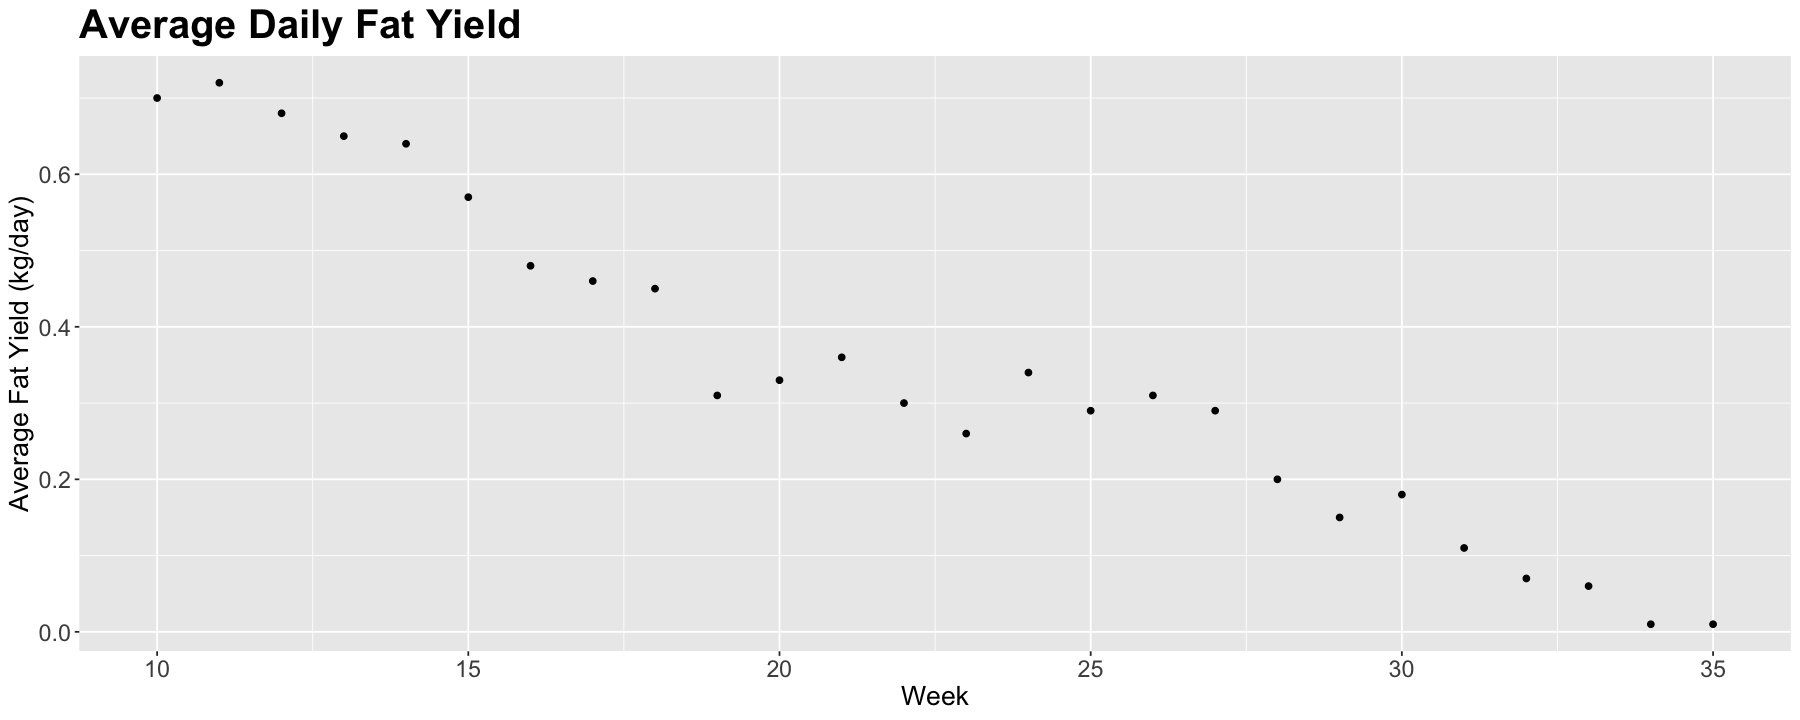

In [7]:
options(repr.plot.height = 6, repr.plot.width = 15)
plot_fat_content_beginning_10 <- fat_content_beginning_10 %>%
  ggplot(aes(week, fat)) +
  geom_point() +
  labs(x = "Week", y = "Average Fat Yield (kg/day)") +
  ggtitle("Average Daily Fat Yield") +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16)
  )
plot_fat_content_beginning_10

Let us fit an ordinary least-squares (OLS) model, i.e., an ordinary linear regression. Note $Y_{\texttt{fat}_i}$ and $X_{\texttt{week}_i}$ are the response and regressor, respectively, for the $i$th observation. Moreover, the error $\varepsilon_i$ is assumed as normal with mean $0$ and unknown variance $\sigma^2$.

$$
Y_{\texttt{fat}_i} = \beta_0 + \beta_1 X_{\texttt{week}_i} + \varepsilon_i
$$

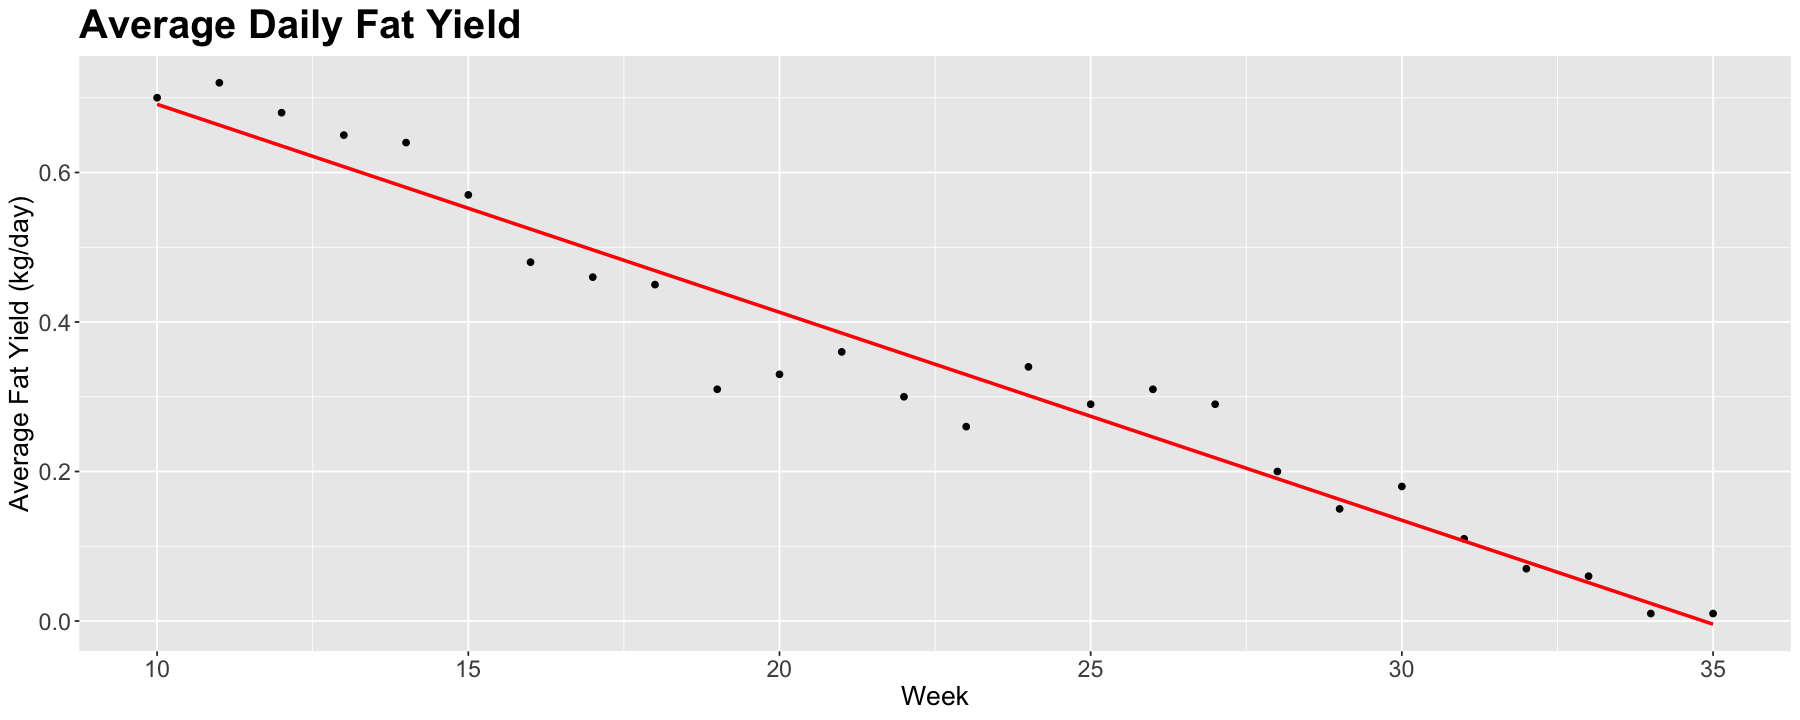

In [8]:
suppressMessages(print(plot_fat_content_beginning_10 +
  geom_smooth(aes(week, fat), method = "lm", se = FALSE, color = "red")))

The previous scatterplot shows a clear negative relationship between `fat` and `week`. We plot this fitted OLS model with `method = "lm"` via `geom_smooth()`.

The model summary is shown below via `tidy()` and `glance()`. The regression coefficient of `week` is statistically significant on the response `fat`: $p\text{-value} < .001$ in column `p.value`. Moreover, the $F$-statistic has an associated $p\text{-value} < .001$, which give us statistical evidence to state that the model fits the data better than an intercept-only model (i.e., the null model).

In [9]:
milk_fat_initial_model <- lm(fat ~ week, data = fat_content_beginning_10)
tidy(milk_fat_initial_model) %>% mutate_if(is.numeric, round, 3)
glance(milk_fat_initial_model) %>% mutate_if(is.numeric, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.969,0.031,30.959,0
week,-0.028,0.001,-21.071,0


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.949,0.947,0.05,443.988,0,1,41.784,-77.568,-73.794,0.061,24,26


Suppose we want to use this regression model to make predictions of the average `fat` content after `week` 35 (i.e., obtaining extrapolated predictions).

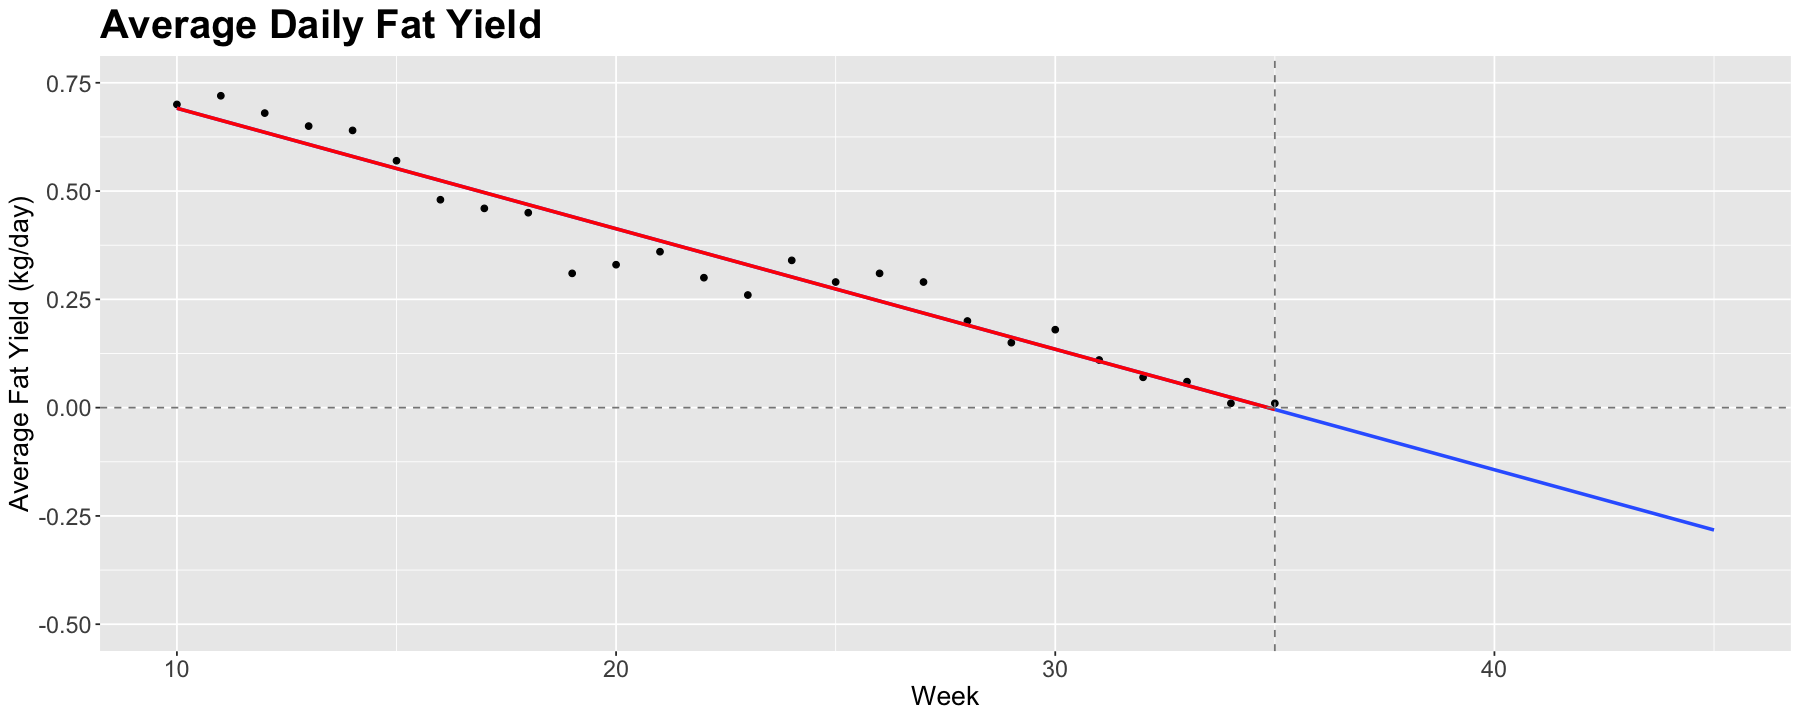

In [10]:
suppressWarnings(suppressMessages(print(plot_fat_content_beginning_10 <- plot_fat_content_beginning_10 +
  ylim(-0.5, 0.75) + xlim(10, 45) +
  stat_smooth(method = "lm", fullrange = TRUE, se = FALSE) +
  geom_smooth(aes(week, fat), method = "lm", se = FALSE, color = "red") +
  geom_vline(xintercept = 35, color = "gray53", linetype = "dashed") +
  geom_hline(yintercept = 0, color = "gray53", linetype = "dashed"))))

The `milk_fat_initial_model` will likely provide negative predictions (blue line in the plot above) on the response after `week` 35, which is absurd in this framework (dashed lines are located on `week`$= 35$ and `fat`$= 0$).

## 4. Can We Apply Linear Regression Here?

We start using three 2-$d$ examples, made with simulated data, to answer a crucial question: *can we apply linear regression here?* We will do it with some additional functions found in `support_functions.R`. Then, with the help of `ggplot2`, we will obtain the corresponding scatterplots of these three examples.

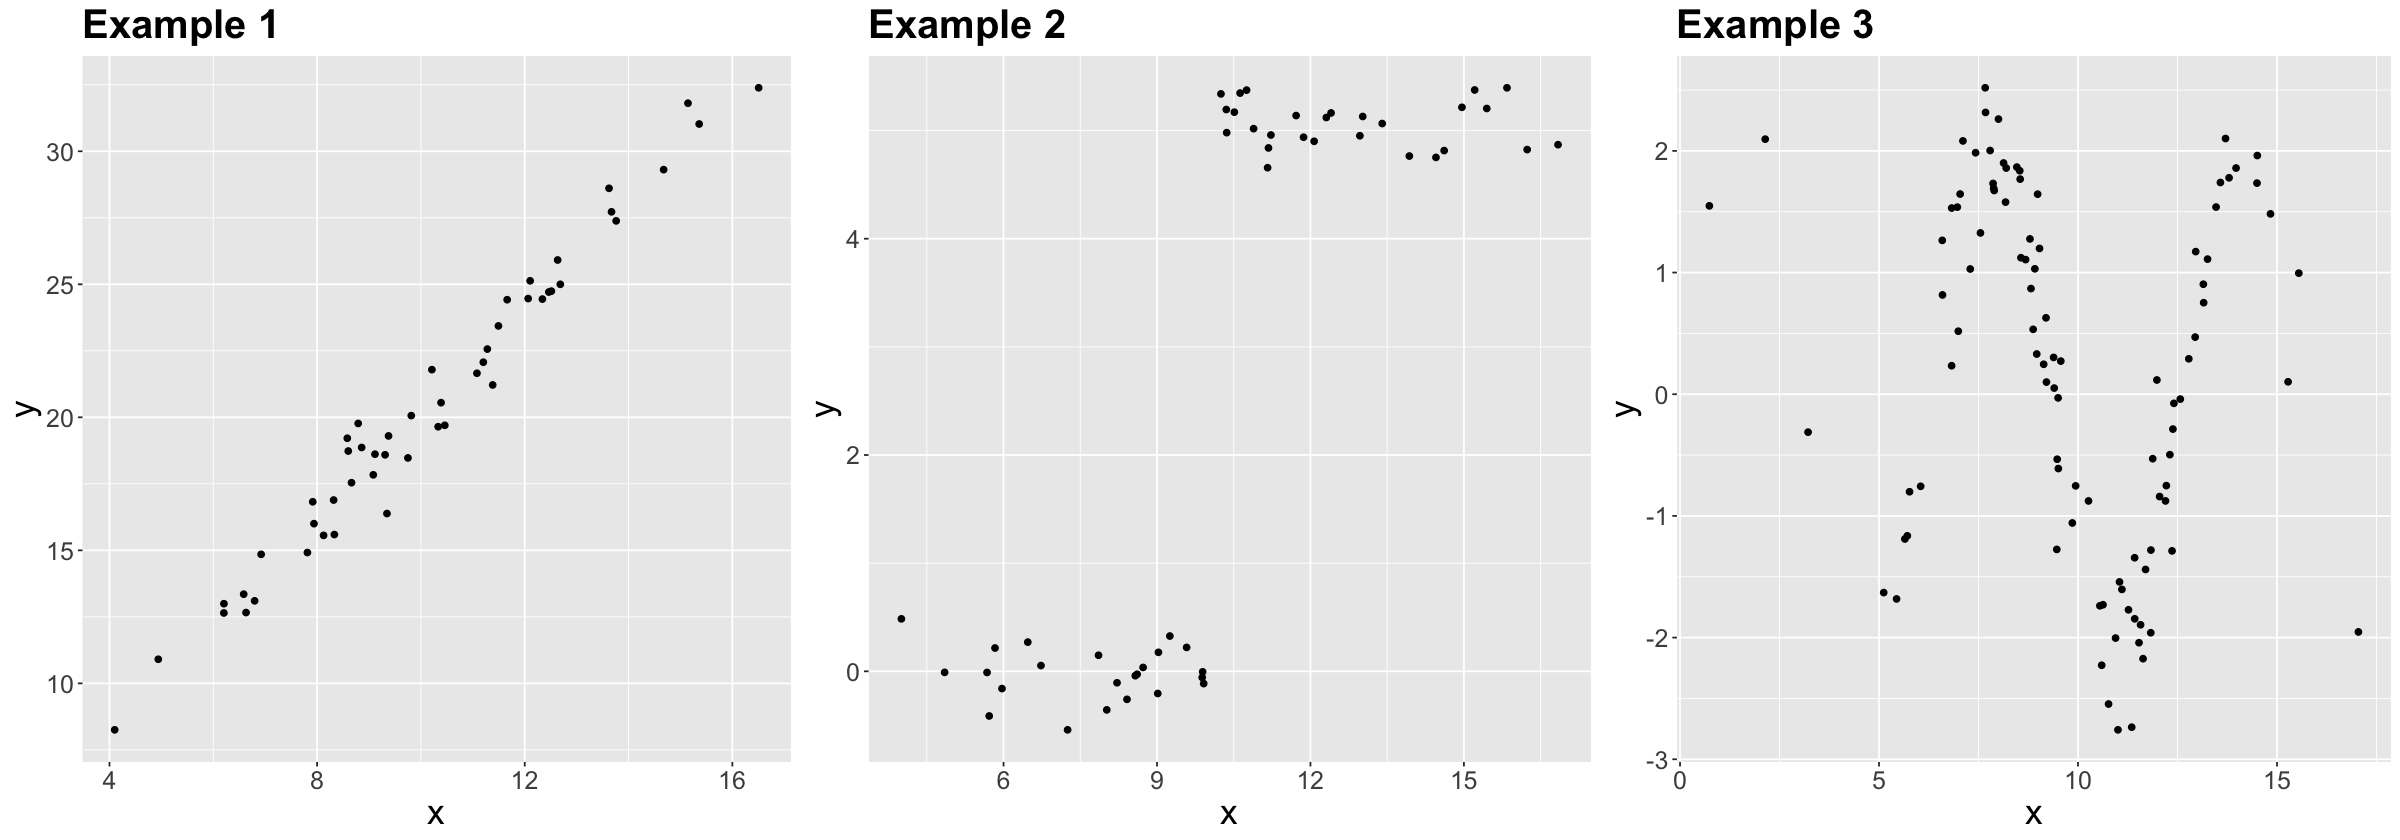

In [11]:
options(repr.plot.height = 7, repr.plot.width = 20)
plot_grid(example_1(), example_2(), example_3(), nrow = 1)

It turns out that the data used for the three plots above come from a linear model. Note that they are *linear on their parameters (i.e., coefficients)* but not on their corresponding regressor $X$. We have to make three crucial remarks in these examples:

- **Example 1** is the classical case of simple linear regression.
- On the other hand, **Example 2** does not show a clear linear relationship between both variables unless our linear approach makes two subsets of points. In that case, we could apply two local linear regression models (to be covered in this course in a further lecture).
- Finally, **Example 3** comes from a sinusoidal curve with an additional random noise (we will provide more details on this case later on in this lecture).

## 5. Basics of Ordinary Linear Regression

In *DSCI 561*, we learned comprehensive material about ordinary linear regression. Why are we using the term *ordinary*? This term refers to a linear model with a response (also known as endogenous variable) of continuous nature. Recall that a continuous variable can take on an infinite number of real values in a given range. This response is subject to regressors (also known as exogenous variables, explanatory variables, features, or predictors). Note that the regressors can be of a continuous or discrete nature. When the regressors are discrete and factor-type (i.e., with different categories), they could be: 

- **Nominal.** In this factor-type, we have categories associated that do not follow any specific order. For example, a clinical trial with a factor of three treatments: *placebo*, *treatment A*, and *treatment B*.
- **Ordinal.** The categories, in this case, follow a specific order. A typical example is the Likert scale of survey items: *strongly disagree*, *disagree*, *neutral*, *agree*, and *strongly agree*.

> **Heads-up:** The ordinary linear case is a practical starting point for explaining regression models.

Conceptually, a linear regression model can be expressed as:

$$\mbox{Response} = \mbox{Systematic Component} + \mbox{Random Component}.$$

- The *systematic component* represents the mean of the response, which is conditioned on the regressor values. 
- The *random component* measures the extent to which the observed value of the response might deviate from its mean and is viewed as random noise. 

For the $i$th observation in our sample ($i = 1, \dots, n$), the conceptual model above is mathematically represented as:

$$
\underbrace{Y_i}_\text{Response}  = \underbrace{\beta_0 + \beta_1 g_1(X_{i, 1}) + \ldots + \beta_p g_p(X_{i,p})}_\text{Systematic Component} + \underbrace{\varepsilon_i}_\text{Random Component}
$$

We highlight the following:

- The response $Y_i$ is equal to the sum of $p + 2$ terms.

- The systematic component is the sum of:
    - An unknown intercept $\beta_0$ and
    - $p$ regressor functions $g_j(X_{i,j})$ multiplied by their respective unknown regression coefficient $\beta_j$.

 - $\varepsilon_i$ is the random noise.

The equation above for $Y_i$ is more detailed as follows:

- The response $Y_i$ depends on the linear combination of the functions $g_j(\cdot)$ of $p$ regressors $X_{i, j}$ of different types (continuous and discrete). 
- Each function $g_j(X_{i,j})$ has an associated regression coefficient. These parameters $\beta_{1}, \dots, \beta_{p}$ represent how much the response is expected to increase or decrease when the function $g_j(X_{i,j})$ changes by one unit of the $j$th regressor. An additional parameter $\beta_0$ represents the mean of the response when all the $p$ functions $g_j(X_{i,j})$ are zero. All these elements represent the systematic component of the model.
- The term $\varepsilon_i$ is an unobserved random variable and represents the random component. These variables are **usually** assumed to be normally distributed with mean of zero and a common variance $\sigma^2$ (i.e., *homoscedasticity*). Moreover, all $\varepsilon_i$s are assumed to be independent. 
- Hence, each $Y_i$ is also assumed to be independent and normally distributed:

$$
Y_i \mid X_{i, j} \sim \mathcal{N} \big( \beta_0 + \beta_1 g_1(X_{i, 1}) + \ldots + \beta_p g_p(X_{i,p}), \sigma^2 \big).
$$

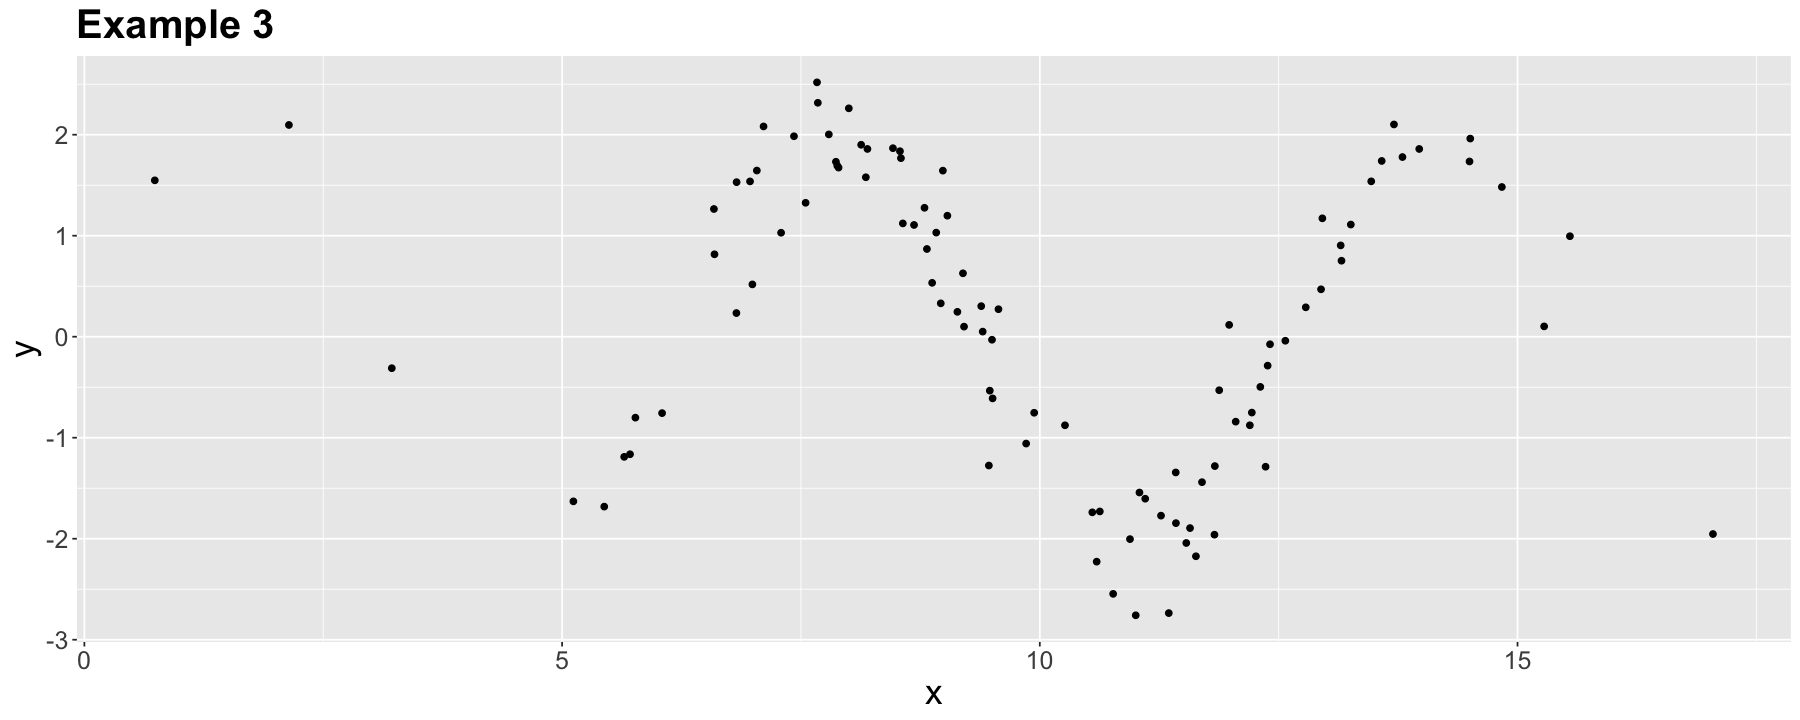

In [12]:
options(repr.plot.height = 6, repr.plot.width = 15)
example_3()

Now, **Example 3** makes sense as a linear model:

```{math}
\begin{align*}
Y_i &= \beta_0 + \beta_1 g_1(X_{i, 1}) + \varepsilon_i \\
&= \beta_0 + \beta_1 \sin(X_{i, 1}) + \varepsilon_i.
\end{align*}
```

When a linear regression model has more than one regressor, then we call it *multiple linear regression model*.

OLS implicate the identity function $g_j(X_{i, j}) = X_{i, j}$, leading to:

```{math}
\begin{align*}
Y_i &= \beta_0 + \beta_1 g_1(X_{i, 1}) + \ldots + \beta_p g_p(X_{i,p}) + \varepsilon_i \\
&= \beta_0 + \beta_1 X_{i,1} + \ldots + \beta_p X_{i,p} + \varepsilon_i.
\end{align*}
```

Suppose we have a dataset of $n$ observations, i.e. for $i = 1, \dots, n$. Then all the $X_{i, j}$ become observed values $x_{i, j}$ (note the lowercase), leading to the following conditional expected value of the OLS model above as:

$$
\mathbb{E}(Y_i \mid X_{i,j} = x_{i,j}) = \beta_0 + \beta_1 x_{i,1} + \ldots + \beta_p x_{i,p} \; \; \; \; \text{since} \; \; \; \; \mathbb{E}(\varepsilon_i) = 0.
$$

We can see that the regression coefficients' interpretation is targeted to explain each regressor's numerical association (or effect if we are conducting an experiment!) on the mean of the response, *if we fulfill the assumptions on the random component* $\varepsilon_i$.

### 5.1. Categorical Regressors

If the $j$th explanatory variable of interest is continuous, its observed value is expressed as a single $x_{i,j}$ for the $i$th observation. Suppose a explanatory variable of interest is nominal. In that case, we will need to use a dummy variable to identify the category to which each observation belongs. For instance, if a discussed categorical explanatory variable of interest has $m$ categories or levels, we could define $m-1$ dummy variables as shown in the coding scheme in the table below. Note that *Level 1* is taken as the baseline (reference) level: if the $i$th observation belongs to *Level 1* then all the dummy variables $x_{i,1}, \cdots, x_{i,(m -1)}$ take on the value $0$. The choice of baseline has an impact on the interpretation of the regression coefficients. The baseline is related to the role of the intercept $\beta_0$.

    
| **Level** | *x*<sub>i,1</sub> | *x*<sub>i,2</sub> |  …  | *x*<sub>*i,*(*m* − 1)</sub> |
|:---------:|:------------------:|:------------------:|:---:|:--------------------------:|
|     **1**     |         0          |         0          |  ⋯  |             0              |
|     **2**     |         1          |         0          |  ⋯  |             0              |
|     ⋮     |         ⋮          |         ⋮          |  ⋱  |             ⋮              |
|    **m**    |         0          |         0          |  ⋯  |             1              |


### 5.2. Estimation

The next matter to address is how to estimate our model parameters since these are unknown. In order to fit a linear regression model for a given dataset of $n$ observations, we have to estimate the $p + 2$ parameters $\beta_0, \beta_1, \dots, \beta_p, \sigma^2$ by minimizing the sum of squared residuals (i.e., least-squares estimation) **OR** maximizing the likelihood function of the sample. The likelihood function is the joint probability density function of the observed data as a function of the unknown parameters $\beta_0, \beta_1, \dots, \beta_p, \sigma^2$ we are willing to estimate. A particular distribution is assumed for the individual observations. Maximum likelihood estimation aims to find the values of those parameters for which the observed data is more probable (or likely). The likelihood function for the multiple linear regression model is described as follows:

- We assume a random sample of $n$ elements. Thus, the normal $Y_i$s are independent, which allows us to obtain the sample's joint probability density function. 
- The joint function is obtained by multiplying the $n$ normal probability density functions altogether. This joint probability density function is the likelihood function of the observed data. It is conditioned on the unknown set of parameters we are willing to estimate.
- The maximum likelihood method takes the first partial derivatives of the *log-likelihood function* with respect to $\beta_0, \beta_1, \dots, \beta_p, \sigma^2$. Then, we set these derivatives to zero and isolate the corresponding terms. This procedure yields the maximum likelihood estimates.
- The case of simple linear regression (as in $\beta_0$, $\beta_1$, and $\sigma^2$) can be handled in scalar notation. However, in the presence of a considerable number of coefficients, it is more efficient to work with the model in matrix notation. Then, matrix calculus comes into play.

Now, we might wonder: *how is maximum likelihood estimation (MLE) related to OLS?* This is the point were the assumptions on the error component $\varepsilon_i$ have a key role in MLE. If we make the corresponding mathematical derivations, it turns out that maximizing the log-likelihood function is equivalent to minimizing the sum of squared residuals.

### 5.3. Inference

<a id='basics'></a> The estimated model can be used for two purposes: *inference* and *prediction*. In terms of inference, we use the fitted model to identify the relationship between the response and regressors. We will need the $j$th estimated regression coefficient $\hat{\beta}_j$ and its corresponding variability which is reflected in the standard error of the estimate, $\mbox{se}(\hat{\beta}_j)$. To determine the statistical significance of $\hat{\beta}_j$, we use the test statistic

$$t_j = \frac{\hat{\beta}_j}{\mbox{se}(\hat{\beta}_j)}$$

to test the hypotheses

$$ H_0: \beta_j = 0$$
$$H_a: \beta_j \neq 0.$$

A statistic like $t_j$ is referred to as a $t$-value. It has a $t$-distribution under the null hypothesis $H_0$ with $n - p - 1$ degrees of freedom.

We can obtain the corresponding $p$-values for each $\beta_j$ associated to the $t$-values under the null hypothesis $H_0$. The smaller the $p$-value, the stronger the evidence against the null hypothesis $H_0$ in our sample. Hence, small $p$-values (less than the significance level $\alpha$) indicate that the data provides evidence in favour of association between the response variable and the $j$th regressor. Similarly, given a specified $(1-\alpha) \times 100\%$ level of confidence, we can construct confidence intervals for the corresponding true value of $\beta_j$:

$$
\hat{\beta}_j \pm t_{\alpha/2, n - p - 1}\mbox{se}(\hat{\beta}_j),
$$

where $t_{\alpha/2, n - p- 1}$ is the upper $\alpha/2$ quantile of the $t$-distribution with $n - p - 1$ degrees of freedom.

### 5.4. Violations of Assumptions

The multiple linear regression model is defined as

$$
Y_i = \beta_0 + \beta_1 X_{i,1} + \ldots + \beta_p X_{i,p} + \varepsilon_i,
$$

where $\varepsilon_i$ (random component) is subject to these assumptions:

$$\mathbb{E}(\varepsilon_i) = 0$$
$$\text{Var}(\varepsilon_i) = \sigma^2$$
$$\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$$
$$\varepsilon_i \perp \!\!\! \perp \varepsilon_k \; \; \; \; \text{for} \; i \neq k  \; \; \; \; \text{(independence)}.$$

Now, what would happen is these assumptions are violated?

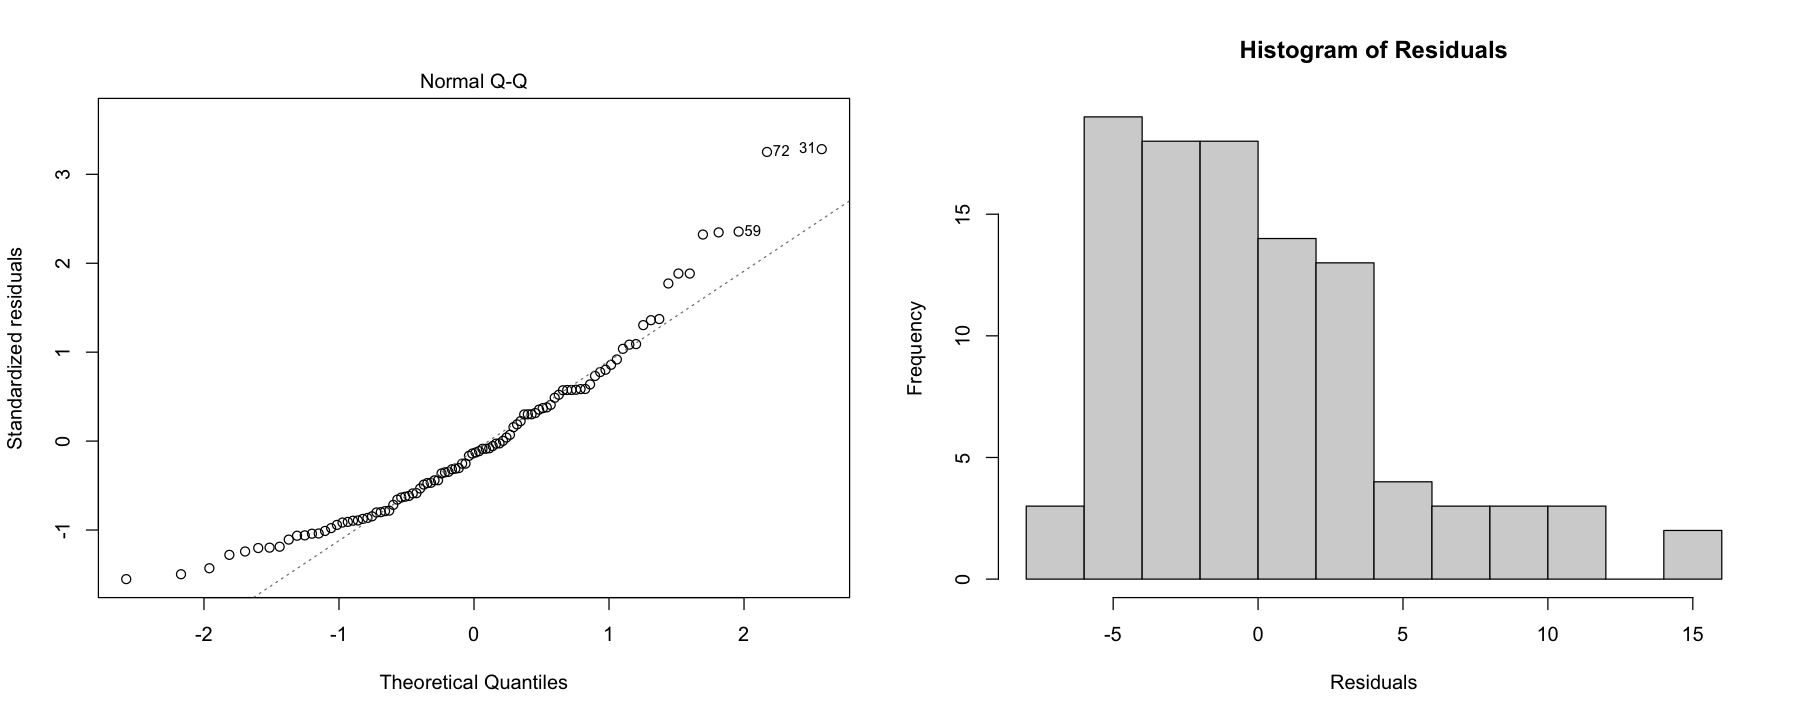

In [13]:
example_non_normality()

The model diagnostics $Q$-$Q$ plot and the histogram of residuals are graphical tools that help us to assess the normality assumptions as follows:

- In the case of the $Q$-$Q$ plot, the ideal result is having all the data points lying on the 45° degree dotted line. This result means that all standardized residuals coming from the fitted model are equal to the theoretical quantiles coming from the standard normal distribution, i.e., $\mathcal{N}(0, 1)$. For the case above, a considerable proportion of these data points is not lying on the 45° degree dotted line suggesting non-normality.
- For the histogram of residuals, we would expect a bell-shaped form as in the normal distribution. Nonetheless, the plot above suggests a right-skewed distribution (also known as positive skewed). 

A distributional misspecification has severe implications for the associated tests ($t$ and $F$-tests). The distributions of the test statistics under $H_0$ rely on these assumptions!

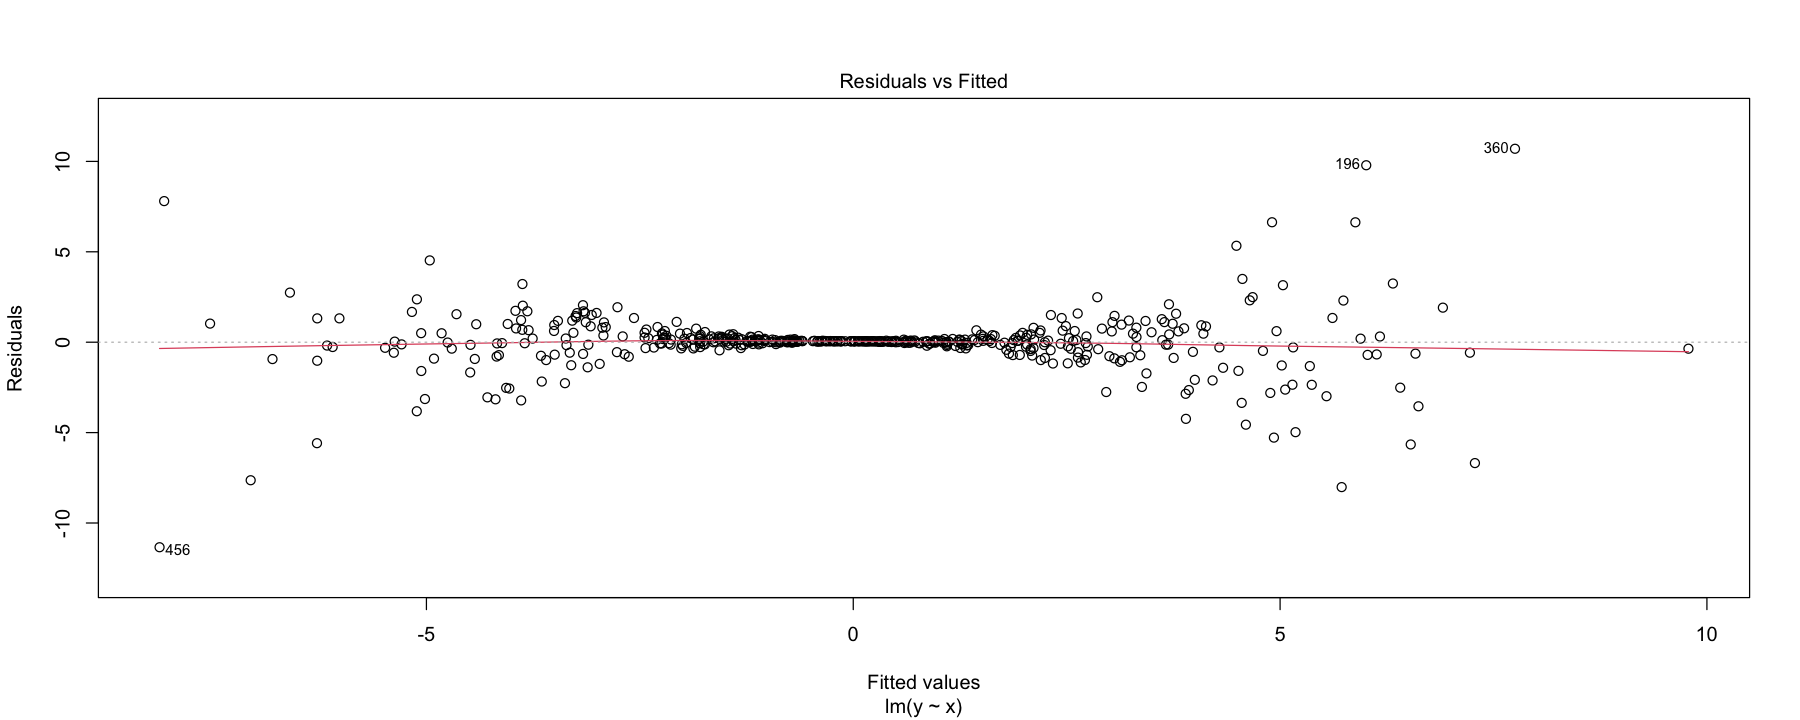

In [14]:
example_heteroscedasticity()

Homoscedasticity is assessed via the diagnostic plot of residuals vs. fitted values. The ideal result would show a uniform cloud of data points. However, the plot above shows a clear pattern composed of two funnel shapes.

Non-constant variance is called *heteroscedasticity*.

Further information on the implication of assumption violations is provided below.

#### 5.4.1. Distributional Misspecification

Fulfilling the model's assumptions on the errors $\varepsilon_i$ has a huge impact on the statistical tests of the multiple linear regression model. The distributions of the test statistics such as the $t$ or the $F$-values heavily rely on the normality of the $\varepsilon_i$s. Suppose we do not fulfil the normality on the random component. In that case, these test statistics will not be reliable unless our sample size $n$ is large enough (i.e., an asymptotical approximation). Then, we are at stake in drawing misleading statistical conclusions on significance. Recall that a hypothesis testing assumes a certain distribution under the null hypothesis $H_0$, which is related to these random components' normality for this model in the $t$ and $F$-tests.

#### 5.4.2. Random Components with Non-Zero Mean

Suppose we misspecified the mean in our multiple linear regression model for our random components, i.e., $\mathbb{E}(\varepsilon_i) = c \neq 0$. This misspecification would be a mild violation. It will be absorbed by the intercept $\beta_0$ leading to $\beta_0^* = \beta_0 + c$ and reflected in the model estimate for the intercept. Note that this $c$ is constant over all the $n$ $\varepsilon_i$s. Nonetheless, suppose there is a further regressor $X_{i, p+1}$ not taken into account. In that case, we are at stake in obtaining biased model estimates along with misleading statistical conclusions on significance. We define this further regressor $X_{i, p+1}$ as a *lurking variable*.

#### 5.4.3. Heterocedasticity

We already defined homoscedasticity as the fact that all $\varepsilon_i$s have $\sigma^2$ as a common variance. However, this assumption commonly gets violated in multiple linear regression and is called heteroscedasticity: the variance of the $\varepsilon_i$s is not constant. A common approach to solve this problem is a response transformation, usually logarithmical, if it is positive.

#### 5.4.4. Correlated Random Components

When we have correlated random components, we are also at the stake of assuming misspecified distributions on our statistical tests. Alternative modelling could deal with this matter (e.g., mixed-effects models to be covered in this course). Again, this correlation leads to misspecified distributions in the $t$ and $F$-tests since the test statistics heavily rely on independence under the null hypothesis $H_0$. The independence between random components could be confirmed via a Durbin-Watson test.

## 6. Model Function

When we are using a set of regressors (or predictors) to explain (or predict) our response, we have to establish a mathematical relationship between them. This is called a functional form (i.e., model function). For instance, in the case $X$ and $Y$:

- Linear: $Y = \beta_0 + \beta_1 X$.
- Exponential: $Y = e^{\beta_0 + \beta_1 X}$.
- In general: $Y = f(X)$.

Once we establish the model function between our variables, we have to specify the nature of it:

- **Deterministic.** For each one of the values of the regressor $X$, there is a single value of $Y$.
- **Stochastic.**  Each value of $X$ has a probability distribution associated to $Y$. 

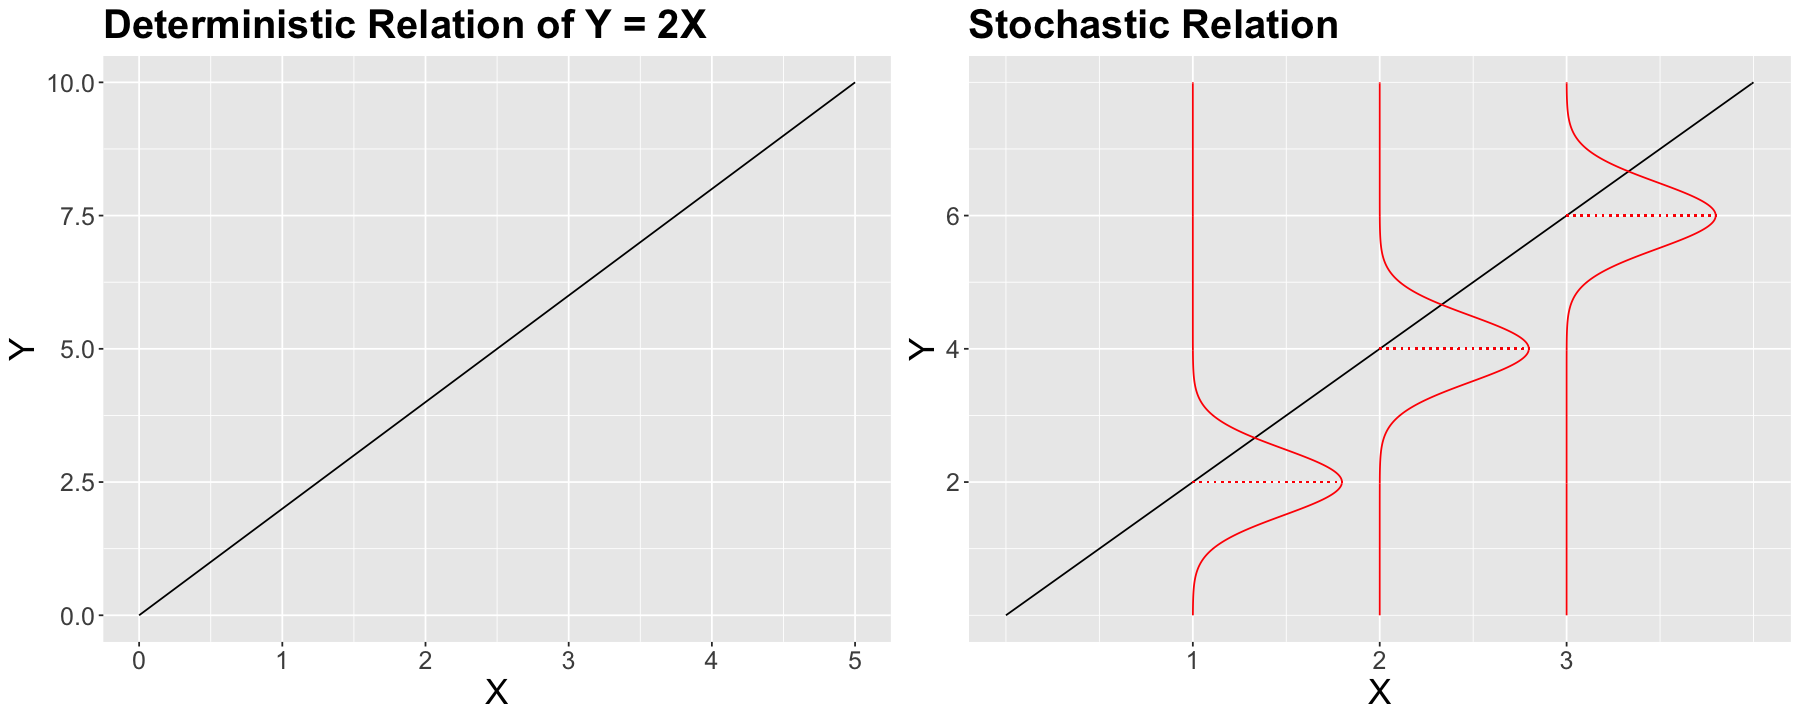

In [15]:
plot_grid(example_deterministic_relation(), example_stochastic_relation(), nrow = 1)

## 7. The Regression Problem

The term *regression* can be extended beyond a linear relationship between the response and regressors. From the previous review on ordinary multiple linear regression, the model can be used for two purposes:

- **Inference.** We want to determine whether there a significant statistical association between the response and regressor (e.g., $t$-tests in ordinary multiple linear regression) and estimate the *effect size*. 
    - There is uncertainty associated with this estimation (confidence intervals).
- **Prediction.** Given new values for the regressors, we want to predict the corresponding value of the response subject to the effect estimates. 
    - There is uncertainty associated with this prediction (prediction intervals).

### 7.1. Black-Box Models

A model such as in the case of multiple linear regression, specifies the functional form between the regressors and the response along with assumptions on the system or phenomenon we aim to model. This allows interpretability.

On the other hand, a black-box model is focused on optimizing *predictions* subject to a set of regressors with less attention on the internal model's process.

### 7.2. Interpretability in Linear Models

A crucial characteristic of linear models is their relative easiness to interpret the effects of the regressors on the response (via the model's coefficients). 

Moreover, their predictive ability is fair in general.

An additional takeaway on this class of tools is their ability to go beyond the conditioned modelling of the response's means (e.g., medians or certain quantiles).

### 7.3 The Types of Parametric Assumptions

The concept of a *parametric model* varies depending on the field:

- In Computer Science, a parametric model assumes a functional relationship between the regressors and response (e.g., linear).
- In Statistics, a parametric model has distributional assumptions on its components.

#### An Example Where Classical Linear Regression Goes Totally Wrong

We have to be careful when using linear models in specific complex datasets if we only appeal to their easiness of interpretability. When we do not capture the right functional form between the regressors and the response, the chances of having a misspecified model are high. For the sake of this example, we will build a simulated dataset similar to the previous **Example 3**. Assume that the true functional form in this 2-$d$ example is as follows:

```{math}
\begin{align*}
Y_i &= \beta_0 + \beta_1 g(X_i) + \varepsilon_i \\
&= \beta_0 + \beta_1 \sin(X_i) + \varepsilon_i \\
&= 5 + 10 \sin(X_i) + \varepsilon_i
\end{align*}
```

with 

$$\mathbb{E}(\varepsilon_i) = 0$$
$$\text{Var}(\varepsilon_i) = \sigma^2 = 1.5$$
$$\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$$
$$\varepsilon_i \perp \!\!\! \perp \varepsilon_k \; \; \; \; \text{for} \; i \neq k.$$

We simulate a dataset of $n = 234$ observations with $x_i \in [2, 13.65]$. Recall that function `rnorm()` provides our normal error components with the parameters specified above. The code below simulates these data and then provides a scatterplot.

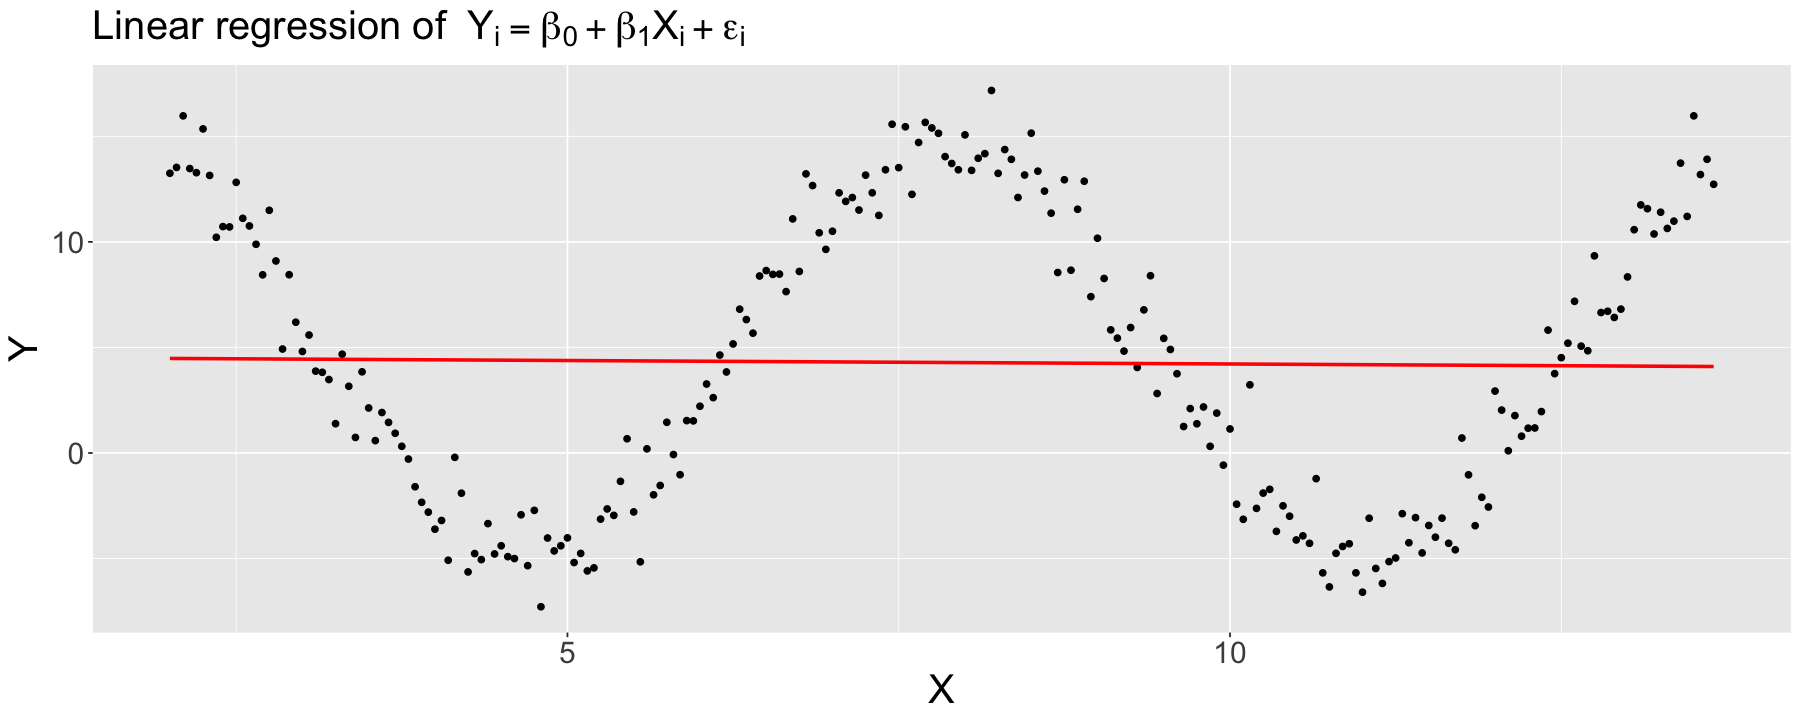

In [16]:
set.seed(123)
sin_data <- tibble(X = seq(2, 13.65, 0.05), Y = 5 + 10 * sin(X) + rnorm(length(seq(2, 13.65, 0.05)), 0, 1.5))
suppressMessages(print(sin_data %>% ggplot() +
  geom_point(aes(X, Y)) +
  geom_smooth(aes(X, Y), method = "lm", se = FALSE, color = "red") +
  ggtitle(bquote("Linear regression of " ~ Y[i] == beta[0] + beta[1] * X[i] + epsilon[i])) +
  theme(
    plot.title = element_text(size = 24),
    axis.text = element_text(size = 18),
    axis.title = element_text(size = 24)
  )))

The code above also fits a linear regression, with `method = "lm"` via `geom_smooth()`, assuming that the "right functional form" is $Y_i = \beta_0^* + \beta_1^* X_i + \varepsilon_i$. Nonetheless, the fitted regression line is flat (i.e., $\hat{\beta}_1^* = -0.03$) and located on $y = 4.55$ (i.e., $\hat{\beta}_0^* = 4.55$). Note that the slope is not even significant ($p \text{-value} = 0.81$). This result is expected in a misspecified model since the least-squares method attempts to reduce the squared distance between the observed and estimated response values *across all points*. Hence, this attempt has a serious impact on a sinusoidal curve, like in this example.

In [17]:
sin_function_model <- lm(Y ~ X, data = sin_data)
tidy(sin_function_model) %>% mutate_if(is.numeric, round, 3)
glance(sin_function_model) %>% mutate_if(is.numeric, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.545,1.136,4.001,0.000
X,-0.033,0.133,-0.246,0.806


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-0.004,6.886,0.061,0.806,1,-782.543,1571.086,1581.452,11002.15,232,234


Therefore, before concluding about the model's estimates, we have to make sure that we are setting up an adequate functional form.

## 8. Restricted Response Ranges in Linear Regression

We initially listed different response types where the ranges are restricted. Now, the next matter to address is how to retain the easiness in the model's interpretability:

- Recall that we might be using the model for inference purposes, and not predictions.
- Hence, a black-box model will not provide a straightforward interpretation.

We could use the following three modelling alternatives.

- Data transformations.
- Scientifically-backed functions.
- Link functions.

### 8.1. Data Transformations

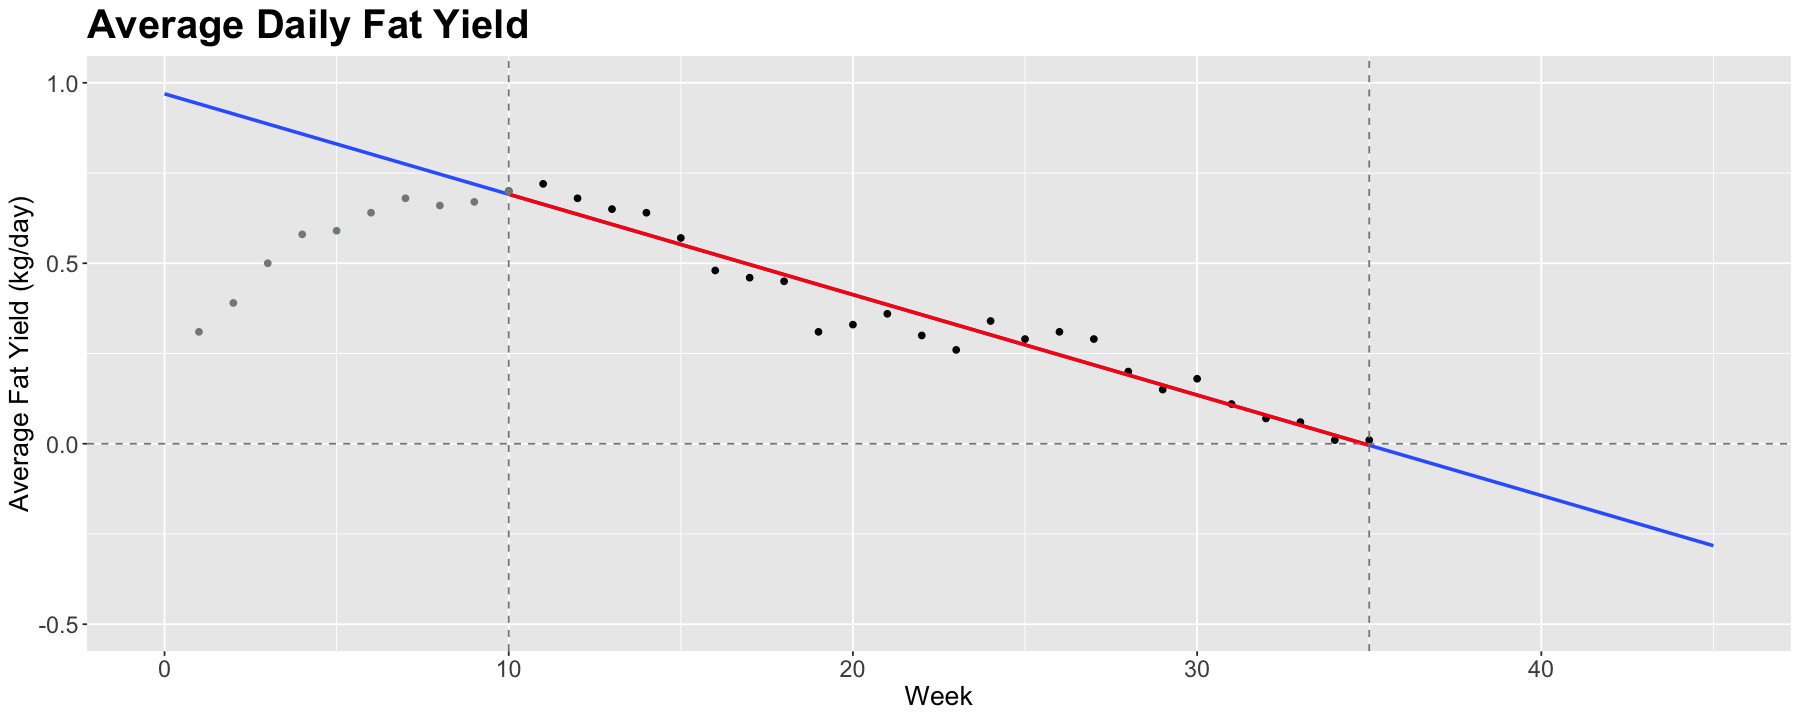

In [18]:
suppressWarnings(suppressMessages(print(plot_fat_content_beginning_10 +
  ylim(-0.5, 1) + xlim(0, 45) + geom_vline(xintercept = 10, color = "gray53", linetype = "dashed") +
  geom_point(fat_content[1:10, ], mapping = aes(week, fat), color = "honeydew4"))))

For the **Cow Milk dataset**, we add the remaining points before `week` 10 in gray on the left-hand side. These points were not used to train our `milk_fat_initial_model` (red line).

As in the case of the extrapolated predictions after `week` 35, the plot above shows that we cannot use this model for extrapolated predictions (in blue) before `week` 10 since the observed responses show a positive relationship with respect to `week`. One solution could be extending our model training beginning `week` 1. Nonetheless, the estimated model parameters (intercept and slope) will be impacted as follows:

In [19]:
milk_fat_full_model <- lm(fat ~ week, data = fat_content)
tidy(milk_fat_full_model) %>% mutate_if(is.numeric, round, 3)
glance(milk_fat_full_model) %>% mutate_if(is.numeric, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.717,0.044,16.460,0
week,-0.018,0.002,-8.377,0


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.68,0.67,0.126,70.178,0,1,23.856,-41.712,-37.046,0.524,33,35


Compared to `milk_fat_initial_model`, the estimated slope for `week` goes from $-0.03$ in the previous model with observations beginning `week` 10 to $-0.02$ in the model above. Furthermore, only 67% of the variation in `fat` is now explained by `week` (`adj.r.squared`). The plot below shows this new model fitting (green line). Note we still have negative extrapolated predictions after `week` 35. **However, we can try another available modelling strategies.**

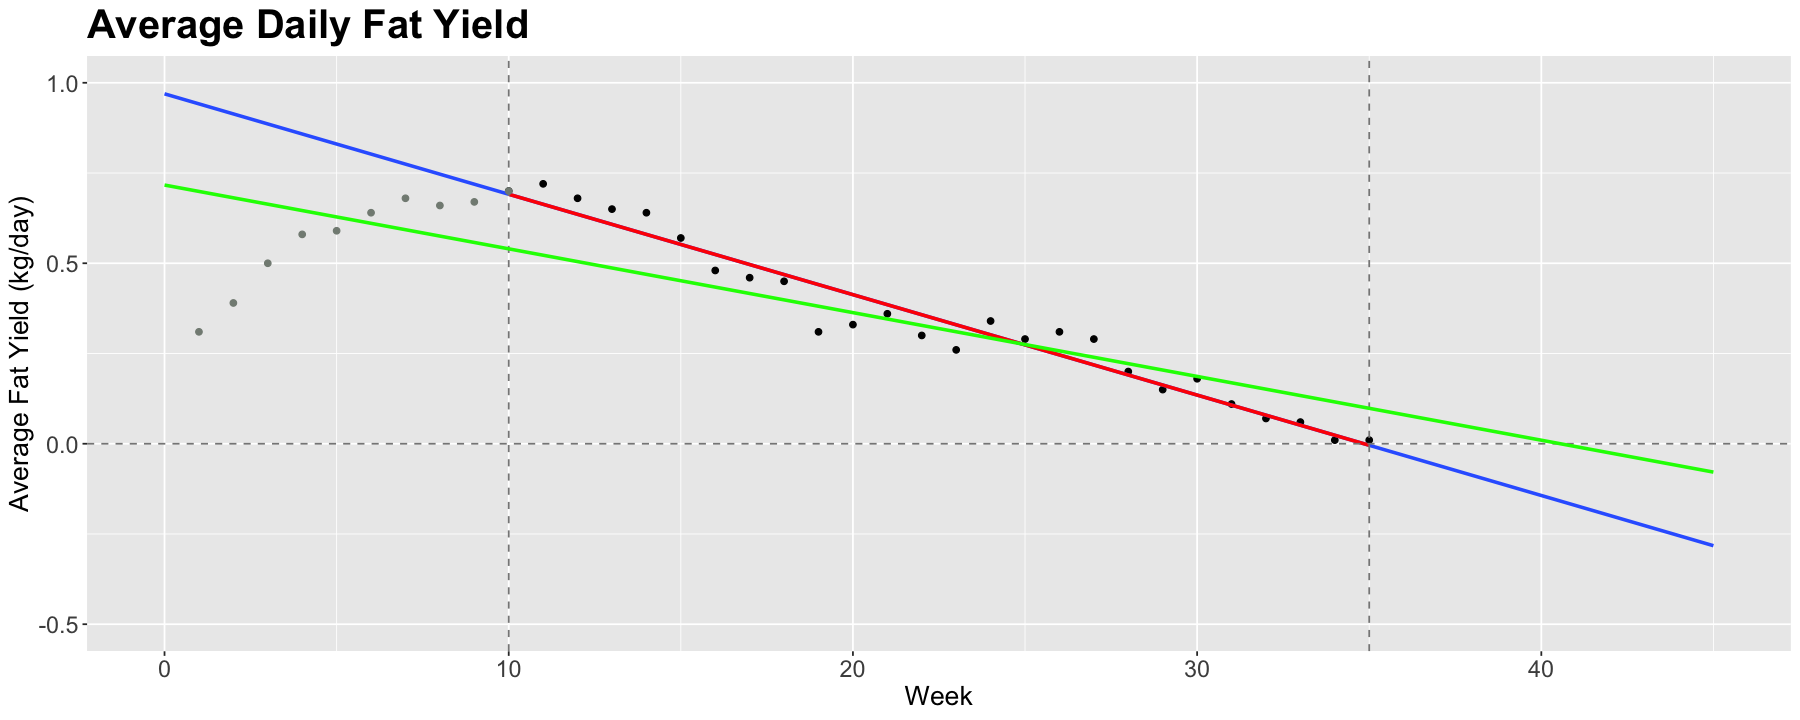

In [20]:
suppressWarnings(suppressMessages(print(plot_fat_content_beginning_10 <- plot_fat_content_beginning_10 +
  ylim(-0.5, 1) + xlim(0, 45) +
  geom_vline(xintercept = 10, color = "gray53", linetype = "dashed") +
  geom_point(fat_content[1:10, ], mapping = aes(week, fat), color = "honeydew4") +
  stat_smooth(fat_content, mapping = aes(week, fat), method = "lm", fullrange = TRUE, se = FALSE, color = "green"))))

One alternative modelling strategy is to transform the response so that its range is no longer restricted. The typical example in positive-only data is a logarithmic transformation, i.e., a *log-response model*:

$$
\log Y_{\texttt{fat}_i} = \beta_0 + \beta_1 X_{\texttt{week}_i} + \varepsilon_i.
$$

The equation above models the logarithm of the production of milkfat on the left hand side $Y_{\texttt{fat}_i}$, subject to regressor $X_{\texttt{week}_i}$ with the usual random component $\varepsilon_i$ on the right hand side for the $i$th observation. Parameters $\beta_0$ and $\beta_1$ are unknown and to be estimated. Note that the $\log$ notation in this equation above refers to the natural logarithm, i.e., logarithm base $e$.

In [21]:
fat_content <- fat_content %>%
  mutate(log_fat = log(fat))
head(fat_content) %>% mutate_if(is.numeric, round, 3)

week,fat,log_fat
<dbl>,<dbl>,<dbl>
1,0.31,-1.171
2,0.39,-0.942
3,0.50,-0.693
4,0.58,-0.545
5,0.59,-0.528
6,0.64,-0.446


We can now fit a linear regression model with the response `log_fat`, as shown in the plot below (purple dashed line) with all the 35 observations from the original dataset `fat_content`.

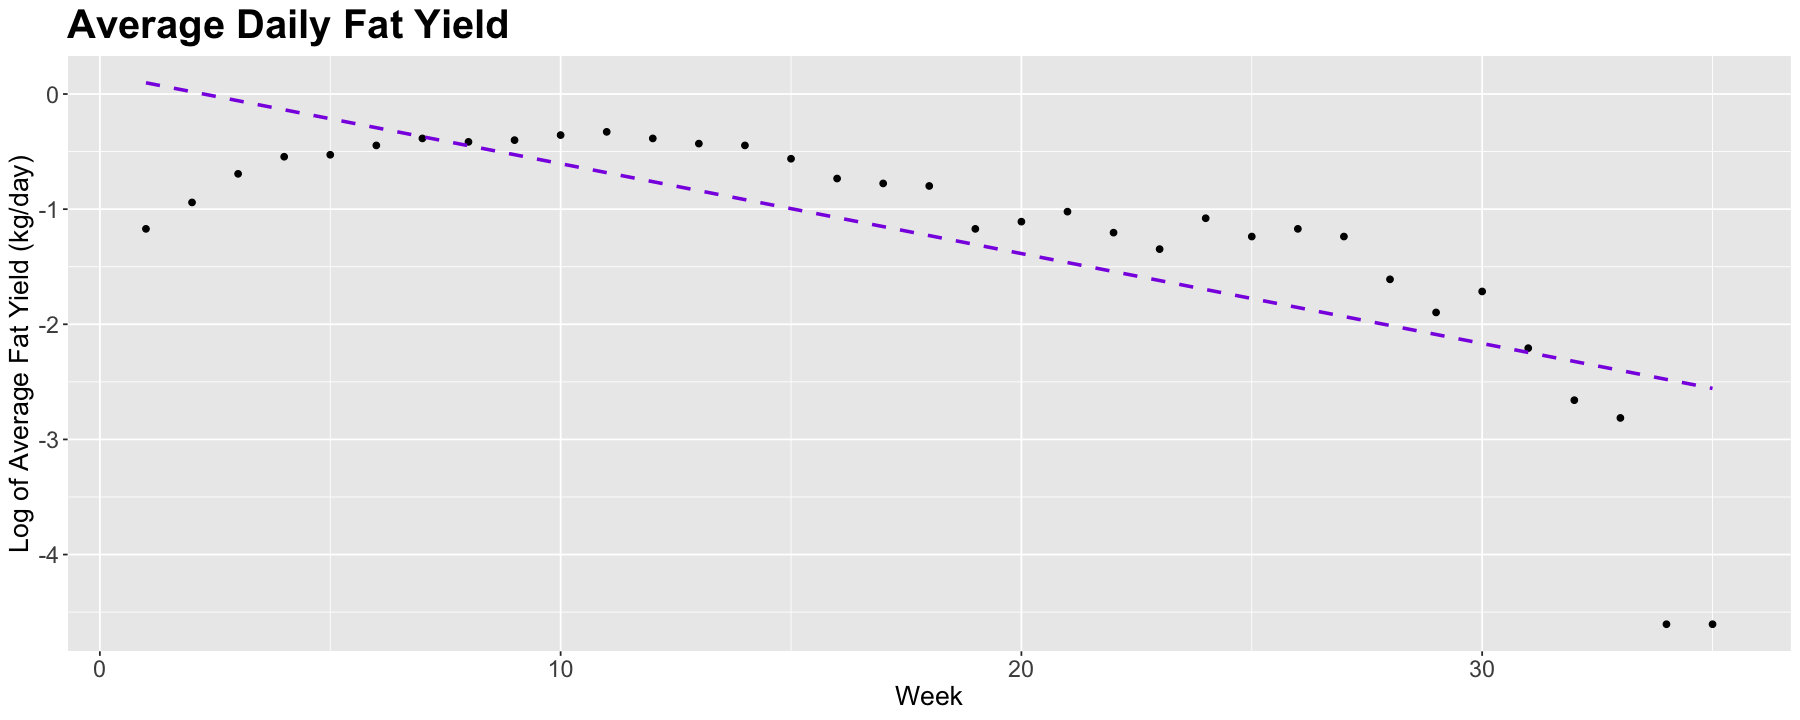

In [22]:
suppressMessages(print((plot_log_fat_content <- fat_content %>%
  ggplot() + geom_point(aes(week, log_fat)) +
  labs(x = "Week", y = "Log of Average Fat Yield (kg/day)") + ggtitle("Average Daily Fat Yield") +
  geom_smooth(aes(week, log_fat), method = "lm", se = FALSE, color = "blueviolet",
    linetype = "dashed"
  ) +
  theme(
    plot.title = element_text(size = 24, face = "bold"), axis.text = element_text(size = 14), axis.title = element_text(size = 16)
  ))))

Note that the interpretability on the estimated slope will change here.

The code below shows the log-response model's summary.

In [23]:
log_fat_model <- lm(log_fat ~ week, data = fat_content)
tidy(log_fat_model) %>% mutate_if(is.numeric, round, 3)
glance(log_fat_model) %>% mutate_if(is.numeric, round, 3)
MSE <- glance(log_fat_model)$sigma^2

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.176,0.241,0.729,0.471
week,-0.078,0.012,-6.680,0.000


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.575,0.562,0.698,44.626,0,1,-36.067,78.133,82.799,16.094,33,35


We can now obtain adequate `fat` predictions (non-negative) beyond `week` 35. Note we have to apply a bias correction ([Dambolena et al., 2009](https://libkey.io/libraries/498/articles/62044506/full-text-file?utm_source=api_542)) on these predictions with mean squared error (`MSE`): **squared `sigma`** from `glance()`, 0.49. 

For example, in $x_{\texttt{week}} = 45$:

$$
\log{\hat{y}_{\texttt{fat}}} = \hat{\beta}_0 + \hat{\beta}_1 x_{\texttt{week}} + \underbrace{0.5 \text{ MSE}}_{\text{Bias Correction}}
$$

```{math}
\begin{align*}
\hat{y}_{\texttt{fat}} &= \exp{(\hat{\beta}_0 + \hat{\beta}_1 x_{\texttt{week}} + 0.5 \text{ MSE})} \\
&= \exp{[0.18 - 0.08 (45) + 0.5 (0.49)]} = 0.04 \text{ kg/day}.
\end{align*}
```

What if we make predictions beyond `week` 35 with this log-response model? How does it compare to the other models? First, we have to transform back our log-prediction along with the bias correction.

In [24]:
log_model_pred <- tibble(week = 1:45, log_fat = predict(log_fat_model, newdata = tibble(week = 1:45)))
log_model_pred <- log_model_pred %>%
  mutate(fat = exp(log_fat + 0.5 * MSE))
head(log_model_pred) %>% mutate_if(is.numeric, round, 3)

week,log_fat,fat
<dbl>,<dbl>,<dbl>
1,0.098,1.407
2,0.020,1.301
3,-0.058,1.204
4,-0.136,1.113
5,-0.215,1.030
6,-0.293,0.952


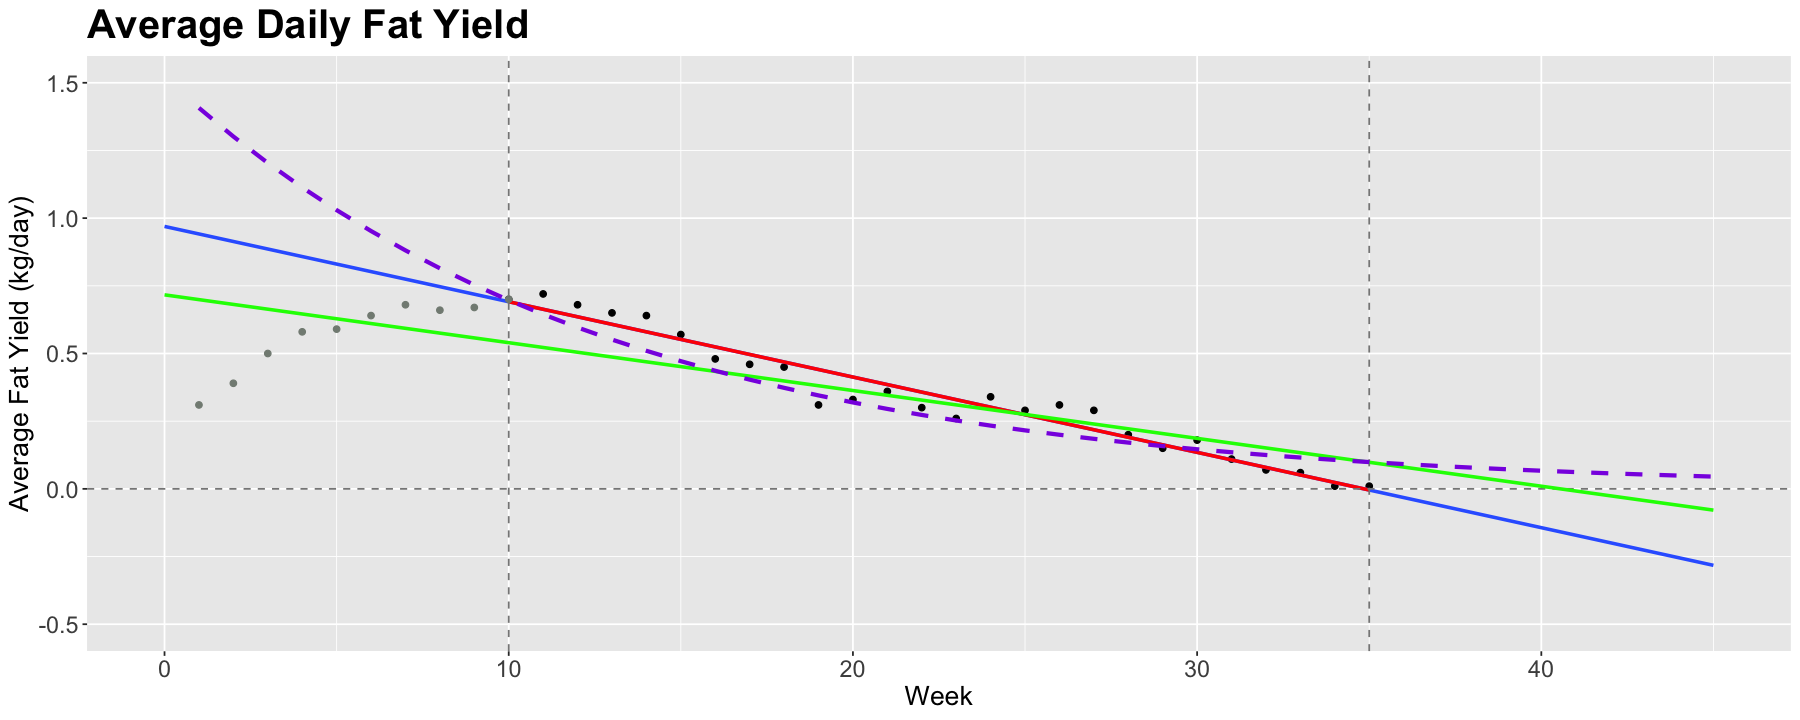

In [25]:
suppressWarnings(suppressMessages(print(plot_fat_content_beginning_10 <- plot_fat_content_beginning_10 +
  ylim(-0.5, 1.5) +
  geom_line(log_model_pred, mapping = aes(week, fat), color = "blueviolet", linetype = "dashed", size = 1.2))))  

The new fitted values for `fat` (purple dashed line) do not got below 0 even at `week` 45. However, this log-response model is not perfect at all.

Note that the fitted values before `week` 10 are larger than those obtained in the previous regression models, which is not desirable. This matter takes us to our next modelling strategy.

### 8.2. Scientifically-Backed Functions

We could also rely on subject-matter expertise.

> **Heads-up:** This backs regression modelling with actual scientific models. The theoretically-derived setup will indicate a meaningful relationship between response and regressors, whose parameters will be estimated with the model fitting.

Again, the **Cow Milk dataset** has a connection  with the algebraic model of the lactation curve in cattle [(Wood, 1967)](https://ubc.summon.serialssolutions.com/2.0.0/link/0/eLvHCXMwfV1LS8NAEF6kIHhRW98voic9xGYzyW4WilCqxYN4ED2XzXRXim2qrRX99242SW0i7TGzEwiZycw3zOQbQsC_9txKTIg8yYw_U2awHBUyFIwr1JE0RZEG3sfKqM7FkoY-RE3fQBQWSFulc56WW0-Pt39DHRXe5YJuduHGcgJK5zDRgLs5k-ZCduluZWuKpgVvwvdP9a-_f9SNK554m2zmINNpZ15RJ2sqaZB1O-yJ0wap5x_01LnMWaevdshHayQnbzft4WvaSh5gq2mvnUycrkwblkVj7Rjw6DxIzLr55dPObPKlyqJB4nQsZXIu3iUv3bvnzr2b72Nw0WR5z6WxgV_UZ5iCCm1qF8VBMlTgaRUjgKAKgcUgI_SBa8H6QkrsM8Yx5MA57JFaMk7UAXGCCEMQ0gQ3oYKYU6GFBMG0L1CHmseH5LwwUu89o93o2XY5RL3ifRqdwnordPYzs841ipOjpSfHZMOEJZ4mKBqckNrnZKZOLSnDmXW2X2pLzng):

$$
f(X_{\texttt{week}}) = \beta_0 X_{\texttt{week}}^{\beta_1} \exp{(\beta_2 X_{\texttt{week}})}.
$$

The term on left-hand side of the equation above is the production of milkfat in week $X_{\texttt{week}}$, $f(X_{\texttt{week}})$. This production is subject to three unknown parameters, on the right hand side, that we are willing to estimate: $\beta_0$, $\beta_1$, and $\beta_2$.   

We could model the  production of milkfat $y_{\texttt{fat}_i}$ in multiple linear regression for the $i$th observation as:

```{math}
\begin{align*}
\log Y_{\texttt{fat}_i} &= \log{[f(X_{\texttt{week}_i})]} + \varepsilon_i \\
&= \log \beta_0 + \beta_1 \log X_{\texttt{week}_i} + \beta_2 X_{\texttt{week}_i} + \varepsilon_i.
\end{align*}
```

A few questions remained unanswered (and to be discussed in `lab1`):

- How can we fit this model?
- What about extrapolated predictions?
- How good is the fitting compared to the previous log-response model?

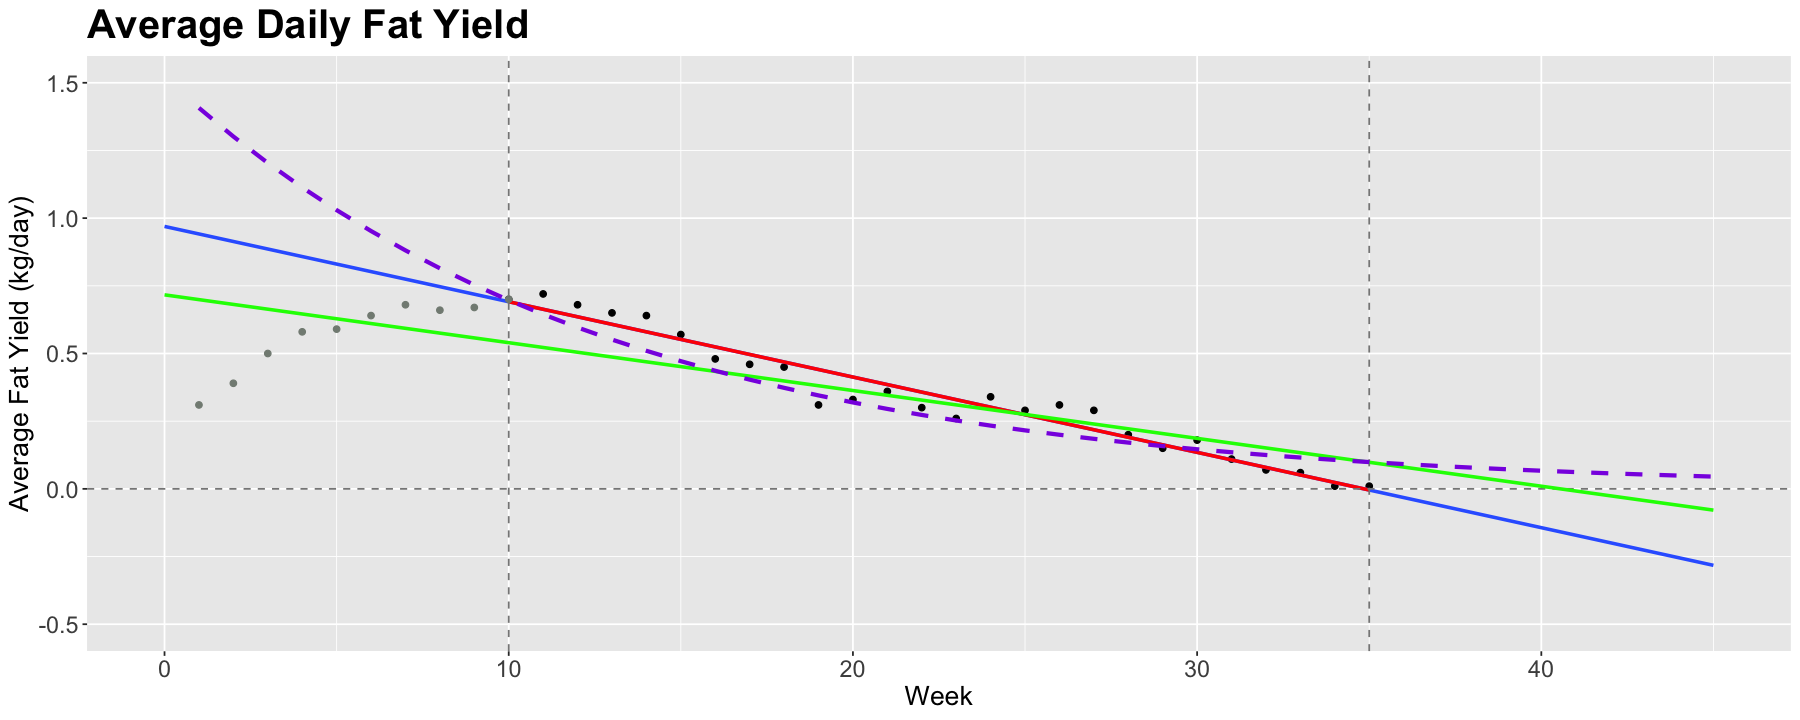

In [26]:
suppressMessages(print(plot_fat_content_beginning_10))

Summarizing, we have three models for this dataset:

- $Y_{\texttt{fat}_i} = \beta_0 + \beta_1 X_{\texttt{week}_i} + \varepsilon_i$ (red, blue, and green).
- $\log Y_{\texttt{fat}_i} = \beta_0 + \beta_1 X_{\texttt{week}_i} + \varepsilon_i$ (purple).
- $\log Y_{\texttt{fat}_i} = \log \beta_0 + \beta_1 \log X_{\texttt{week}_i} + \beta_2 X_{\texttt{week}_i} + \varepsilon_i$ (to be solved in `lab1`).

### 8.3. Link Function

This strategy is closely related to generalized linear models (GLMs), to be covered in **Lecture 2** and **Lecture 3**. 

Multiple linear regression models a continuous response $Y_i$ (a random variable) via its mean (or expected value) $\mu_i$ subject to $p$ regressors $X_{i,j}$:

$$
\mu_i = \mathbb{E}(Y_i \mid X_{i,1}, \ldots, X_{i,p}) = \beta_0 + \beta_1 X_{i,1} + \ldots + \beta_p X_{i,p} \; \; \text{since} \; \; \mathbb{E}(\varepsilon_i) = 0.
$$

Nonetheless, modelling the mean $\mu_i$ of a discrete-type response (such as binary or a count) is not straightforward. Hence, we rely on a monotonic and differentiable function $h(\mu_i)$ called the **link function**.

## 9. Wrapping Up

- Direct ordinary linear regression might not be suitable in many different cases.
- One possible approach is a response transformation to get rid of range issues.
- We can also rely on subject-matter expertise in our regression modelling.
- Nevertheless, what if the nature of our response makes it impossible to apply OLS?